### Seaborn 

In [1]:
### load modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [32]:
#load data
market = pd.read_csv(r'./data/marketdata.csv')

In [33]:
market.shape

(182, 11)

In [34]:
market.head(3)

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46,34,11,11,2020,Monday,707,465,651.375,No Promo
1,10/11/2020,46,34,11,11,2020,Tuesday,1455,10386,1298.250,Promotion Red
2,11/11/2020,46,34,11,11,2020,Wednesday,1520,12475,1559.375,Promotion Blue


In [35]:
# Drop Week and Month Columns
market.drop(columns=['Week', 'Month','Year', 'Day_Name'], inplace=True)

In [36]:
market.dtypes

Date                object
Week_ID              int64
Month_ID             int64
Visitors             int64
Revenue              int64
Marketing Spend    float64
Promo               object
dtype: object

In [37]:
market['Date'] = pd.to_datetime(market['Date'])

In [38]:
market.Promo.value_counts()

No Promo          74
Promotion Blue    54
Promotion Red     54
Name: Promo, dtype: int64

In [39]:
market['Promo'] = market['Promo'].astype('category')

In [41]:
# rename column
market.rename(columns={'Marketing Spend':'Marketing_Spend'}, inplace=True)

In [42]:
market.dtypes

Date               datetime64[ns]
Week_ID                     int64
Month_ID                    int64
Visitors                    int64
Revenue                     int64
Marketing_Spend           float64
Promo                    category
dtype: object

In [46]:
# Check if any column is null
market.isna().sum()

Date               0
Week_ID            0
Month_ID           0
Visitors           0
Revenue            0
Marketing_Spend    0
Promo              0
dtype: int64

In [47]:
market.head()

,Date,Week_ID,Month_ID,Visitors,Revenue,Marketing_Spend,Promo
0,2020-09-11,34,11,707,465,651.375,No Promo
1,2020-10-11,34,11,1455,10386,1298.250,Promotion Red
2,2020-11-11,34,11,1520,12475,1559.375,Promotion Blue
3,2020-12-11,34,11,1726,11712,1801.750,No Promo
4,2020-11-13,34,11,2134,10000,2614.500,No Promo


In [53]:
# Check Date is a unique column 
len(market.Date) == market.Date.nunique()

True

In [54]:
# Set Date as index
market.set_index('Date', inplace=True)

In [55]:
# see first 3 records
market.head(3)

,Week_ID,Month_ID,Visitors,Revenue,Marketing_Spend,Promo
Date,,,,,,
2020-09-11,34,11,707,465,651.375,No Promo
2020-10-11,34,11,1455,10386,1298.250,Promotion Red
2020-11-11,34,11,1520,12475,1559.375,Promotion Blue


In [72]:
sns.set()
sns.set_style('whitegrid')

### To visualize Trend via Line Graph

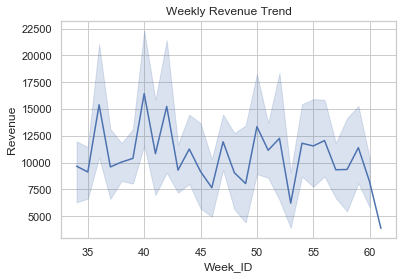

In [74]:
# Weekly trend of Revenue (with 90% CI)
ax = sns.lineplot(x='Week_ID', y='Revenue', ci= 90, data=market)
ax.set_title('Weekly Revenue Trend')

plt.show()

Shaded portion is error band , shows Confidence interval (90%)

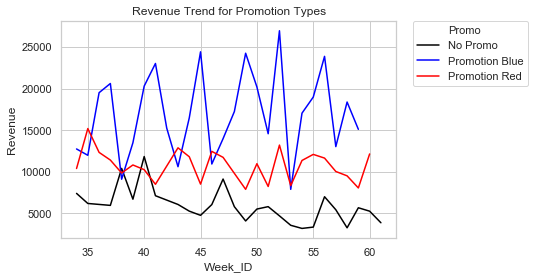

In [106]:
## Revenue Trend by Promotion Type

colors = ['black', 'blue', 'red']
custom_palette = sns.set_palette(sns.color_palette(colors))

ax = sns.lineplot(x='Week_ID', y='Revenue', hue='Promo', 
                  hue_order=['No Promo', 'Promotion Blue', 'Promotion Red'], ci=None, 
                  palette=custom_palette,  data=market)

ax.set_title('Revenue Trend for Promotion Types')

# Put the legend out of the figure
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

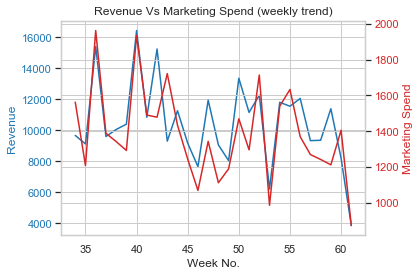

In [89]:
# Comparision of Revenue and Marketing-Spend Trend on weekly basis

fig, ax1 = plt.subplots()

revenue_col='tab:blue'

sns.lineplot(x='Week_ID', y='Revenue', ci=None, color=revenue_col, data=market, ax=ax1)
ax1.set_xlabel('Week No.')
ax1.set_ylabel('Revenue', color=revenue_col)
ax1.tick_params(axis='y', labelcolor=revenue_col)

ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis

mktspend_col='tab:red'
sns.lineplot(x='Week_ID', y='Marketing_Spend', ci=None, color=mktspend_col, data=market, ax=ax2)

ax2.set_ylabel('Marketing Spend', color=mktspend_col)
ax2.tick_params(axis='y', labelcolor=mktspend_col)

ax1.set_title('Revenue Vs Marketing Spend (weekly trend)')
fig.tight_layout()
plt.show()

### Barplots

Text(0.5, 1.0, 'Avg Revenue generated per month')

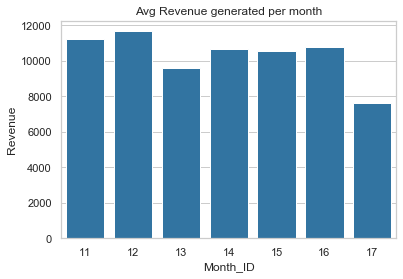

In [97]:
# Create barplot of average revenue generated per Month

ax = sns.barplot(x='Month_ID', y='Revenue',  color='tab:blue', ci=None, data=market)
ax.set_title('Avg Revenue generated per month')

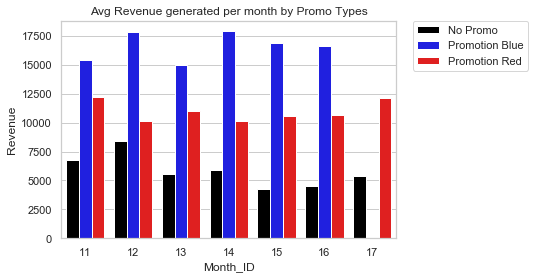

In [107]:
colors = ['black', 'Blue', 'Red']
custom_palette = sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(x='Month_ID', y='Revenue',  hue='Promo',
                 hue_order=['No Promo', 'Promotion Blue', 'Promotion Red'] ,
                 ci=None, data=market, palette=custom_palette)

ax.set_title('Avg Revenue generated per month by Promo Types')

# Put the legend out of the figure
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

### Histogram

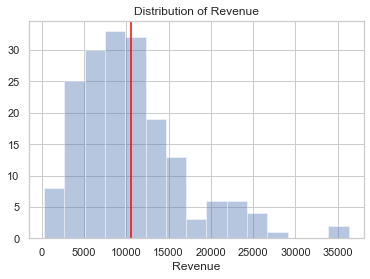

In [193]:
# Distribution of Revenue
sns.set()
sns.set_style('whitegrid')

ax = sns.distplot(market['Revenue'], kde=False)
plt.axvline(x=market['Revenue'].mean(),  color='red')
ax.set_title('Distribution of Revenue')
plt.show()

### BoxPlot

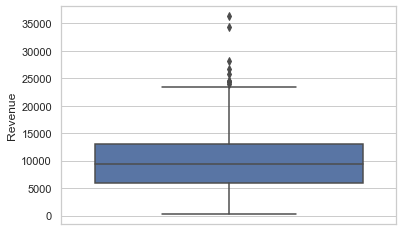

In [121]:
# Boxplot distribution of Revenue
ax = sns.boxplot(market['Revenue'], orient='v')

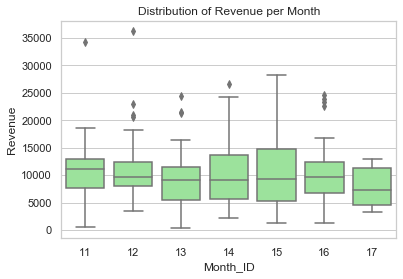

In [126]:
# Boxplot distribution of Revenue by Month
ax = sns.boxplot(x='Month_ID', y='Revenue', color='lightgreen', data=market)
ax.set_title('Distribution of Revenue per Month')

plt.show()

### Scatter Plot

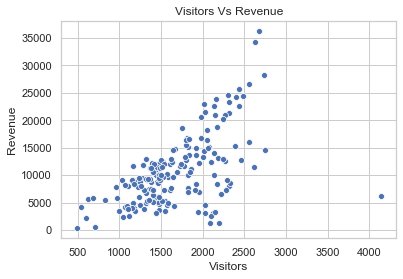

In [135]:
# Scatter plot 
ax = sns.scatterplot(x='Visitors', y='Revenue', data=market)
ax.set_title('Visitors Vs Revenue')

plt.show()

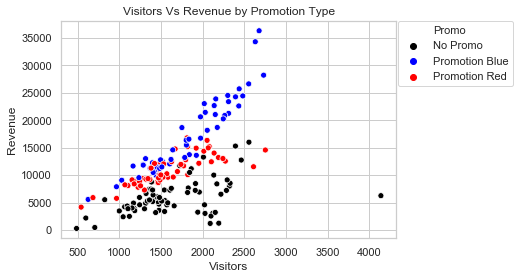

In [190]:
# Scatter plot 

colors = ['black', 'Blue', 'Red']
custom_palette = sns.set_palette(sns.color_palette(colors))

ax = sns.scatterplot(x='Visitors', y='Revenue', hue='Promo', 
                     hue_order=['No Promo', 'Promotion Blue', 'Promotion Red'], data=market)

ax.set_title('Visitors Vs Revenue by Promotion Type')

# Put the legend out of the figure
plt.legend(loc='best', bbox_to_anchor=(1.35, 1), borderaxespad=0.)
plt.show()

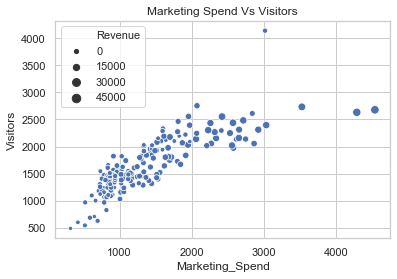

In [170]:
# Scatter plot 'Marketing Spend Vs Visitors'
sns.set()
sns.set_style('whitegrid')
ax = sns.scatterplot(x='Marketing_Spend', y='Visitors', 
                     size='Revenue', 
                     data=market)

ax.set_title('Marketing Spend Vs Visitors')

ax.legend(loc='best')
plt.show()

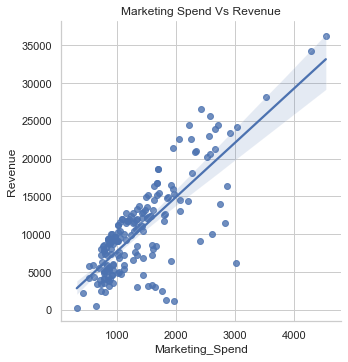

In [174]:
### lmplot

ax = sns.lmplot(x='Marketing_Spend', y='Revenue', data=market)

plt.title('Marketing Spend Vs Revenue')
plt.show()

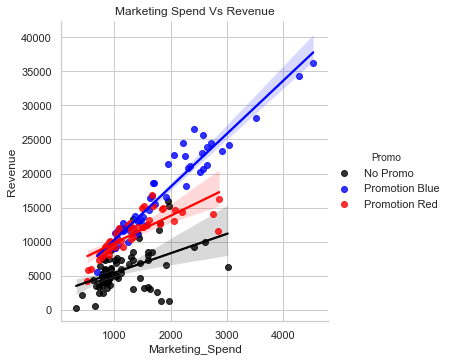

In [176]:
### lmplot
colors = ['black', 'Blue', 'Red']
custom_palette = sns.set_palette(sns.color_palette(colors))

ax = sns.lmplot(x='Marketing_Spend', y='Revenue', hue='Promo', 
                hue_order=['No Promo', 'Promotion Blue', 'Promotion Red'],
                data=market)

plt.title('Marketing Spend Vs Revenue')
plt.show()

### Correlation

In [182]:
corr_data = market.loc[:, ['Marketing_Spend', 'Revenue', 'Visitors']].corr()
corr_data

,Marketing_Spend,Revenue,Visitors
Marketing_Spend,1.000000,0.790425,0.824810
Revenue,0.790425,1.000000,0.573842
Visitors,0.824810,0.573842,1.000000


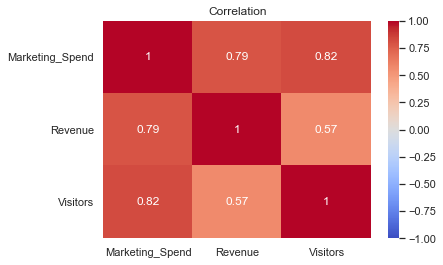

In [187]:
ax = sns.heatmap(corr_data, cmap='coolwarm', vmin=-1, annot=True)
ax.set_title('Correlation')

plt.show()